In [48]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Setting the Tomography Problem:

Text(0.5, 1.0, 'Synthetic Model')

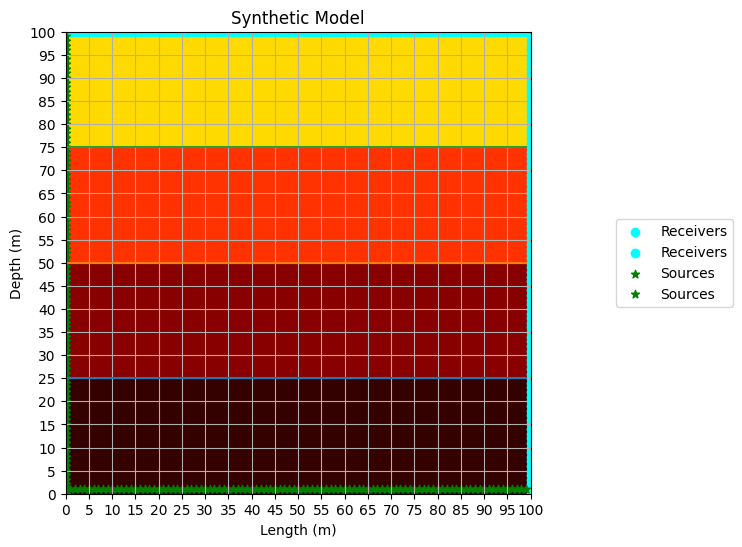

In [2]:
x = 100
y = 100
div = 5
n = 4
nr = 100

# x_hyp = x/2
# y_hyp = y/100

x_grid=np.linspace(0,x,10*x)
y_grid=np.linspace(0,x,10*x)
x_rec = np.zeros(nr)
for i in range(nr):
    x_rec[i] = i*(x/nr)
y_rec = y*np.ones(nr)
fig=plt.figure(figsize=(6,6))
X,Y=np.meshgrid(x_grid,y_grid)
Z=100*np.floor(Y*n/np.max(y_grid))
plt.contourf(X,Y,Z,cmap='hot')
plt.scatter(x_rec,y_rec,color='cyan',label='Receivers')
plt.scatter(y_rec,x_rec,color='cyan',label='Receivers')
# plt.scatter(x_hyp,y_hyp,marker='*')
plt.scatter(x_rec,np.ones(nr),color='green',marker='*',label='Sources')
plt.scatter(np.zeros(nr),x_rec,color='green',marker='*',label='Sources')
for i in range(0,n-1):
    plt.plot(np.arange(0,x),((i+1)*y/n)*np.ones(x))
plt.xticks(np.linspace(0,x,int((x/div)+1)))
plt.yticks(np.linspace(0,y,int((y/div)+1)))
plt.grid()
# plt.colorbar(cmap='hot')
plt.xlim(0,x)
plt.ylim(0,y)
plt.xlabel("Length (m)")
plt.ylabel("Depth (m)")
plt.legend(loc='center right', bbox_to_anchor=(1.45,0.5))
plt.title("Synthetic Model")

### Velocity model: Assumed

In [3]:
v=np.linspace(100,400,n)

T1=np.zeros(nr)
for i in range(0,nr):
    for j in range(0,n):
        T1[i]+=(y/(n*v[j]))
T2=np.zeros(nr)
j=0
for i in range(0,nr):
    if i==0:
        T2[i]+=(y/v[j])
    for k in range(0,n):
        if np.logical_and(i>k*nr/n,i<(k+1)*nr/n):
            T2[i]+=(y/v[j])
        if np.logical_and(i==k*nr/n,k!=0):
            T2[i]+=(y/v[j])
            j+=1
T=np.hstack((T1,T2)) #Calculated traveltimes from assumed velocity model

v

array([100., 200., 300., 400.])

### Kernel Matrix, Pseudoinverse Calculation

In [45]:
G1=(y/n)*np.ones((nr,n))
G2=np.zeros((n,nr))
for i in range(0,n):
    G2[i]=100*(np.hstack((np.ones(int((i+1)*x/n)),np.zeros(int(x-(i+1)*x/n))))-(lambda a: 0 if a==0 else 1)(i)*(np.hstack((np.ones(int(i*x/n)),np.zeros(int(x-(i*x/n)))))))
G=np.vstack((G1,G2.T))

### Velocity model: Predicted

$m=(G^TG)^{-1}G^Td$

In [5]:
a=np.matmul(np.linalg.pinv(G),T)
1/a

array([100.37641154, 193.70460048, 297.39776952, 400.66777963])

### Plotting Reconstructed Model:

Text(0.5, 1.0, 'Reconstructed Model')

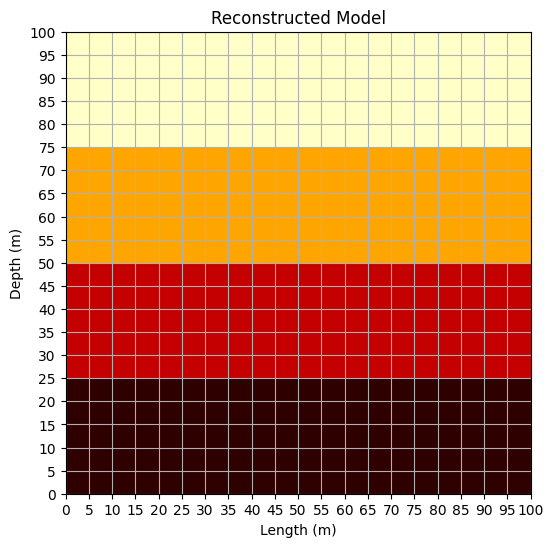

In [7]:
vel=np.zeros((10*x,10*x))
for i in range(0,n):
    vel[:10*x][int(i*10*x/n):int((i+1)*10*x/n)]=1/a[i]
    
fig=plt.figure(figsize=(6,6))
plt.xticks(np.linspace(0,x,int((x/div)+1)))
plt.yticks(np.linspace(0,y,int((y/div)+1)))
x_grid=np.linspace(0,x,10*x)
y_grid=np.linspace(0,x,10*x)
X,Y=np.meshgrid(x_grid,y_grid) 
Z=vel
plt.contourf(X,Y,Z,cmap='hot')
plt.grid()
plt.xlim(0,x)
plt.ylim(0,y)
plt.xlabel("Length (m)")
plt.ylabel("Depth (m)")
plt.title("Reconstructed Model")

### RMS Error:

In [8]:
e=0
for i in range(0,n):
    e+=(v[i]-(1/a[i]))**2
print("Error calculated:", np.sqrt(e)/n)

Error calculated: 1.7137545375327707
